In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from matplotlib.colors import LogNorm
import scipy.stats as st

In [58]:
from astropy.cosmology import FlatLambdaCDM

In [59]:
name = '/archive1/users/grandis/DESY3_X_eRASS1/erass1_cl_v0.2.fits'

hdulist_erassX = fits.open(name)
scidata_erassX = hdulist_erassX[1].data

In [62]:
zmin = 0.05
zmax = 0.8

lam_min = 5

cr_min = 1e-2
CR_KEY = 'ML_RATE_0'

flag = ( scidata_erassX['best_z']<zmax ) & ( zmin<scidata_erassX['best_z'] ) \
       & (scidata_erassX['IN_XGOOD']==True) & (scidata_erassX['SPLIT_CLEANED']==True) & \
        (scidata_erassX[CR_KEY] > cr_min) & (scidata_erassX['lambda_norm'] > lam_min) 

flag2 = ( scidata_erassX['best_z']<zmax ) & ( zmin<scidata_erassX['best_z'] ) \
       & (scidata_erassX['IN_XGOOD']==True) & (scidata_erassX['SPLIT_CLEANED']==True) & \
        (scidata_erassX[CR_KEY] > cr_min)

flag_fit = ( scidata_erassX['best_z']<1. ) & ( 0.01<scidata_erassX['best_z'] ) \
       & (scidata_erassX['IN_XGOOD']==True) & (scidata_erassX['SPLIT_CLEANED']==True)

In [63]:
print(np.sum(flag))
print(np.sum(flag2))

11152
11942


In [5]:
for n in hdulist_erassX[1].data.names:
    if n[0]=='M':
        print(n)

ML_RADIUS
MASKFRAC
ML_CTS_0
ML_CTS_ERR_0
ML_CTS_LOWERR_0
ML_CTS_UPERR_0
ML_RATE_0
ML_RATE_ERR_0
ML_RATE_LOWERR_0
ML_RATE_UPERR_0
ML_FLUX_0
ML_FLUX_ERR_0
ML_FLUX_LOWERR_0
ML_FLUX_UPERR_0
ML_BKG_0
ML_CTS_1
ML_CTS_ERR_1
ML_CTS_LOWERR_1
ML_CTS_UPERR_1
ML_RATE_1
ML_RATE_ERR_1
ML_RATE_LOWERR_1
ML_RATE_UPERR_1
ML_FLUX_1
ML_FLUX_ERR_1
ML_FLUX_LOWERR_1
ML_FLUX_UPERR_1
ML_BKG_1
ML_EXP_1
ML_EEF_1
MEM_MATCH_ID
MASKGAL_INDEX
MAX_IND
MASKFRAC_OPT
M500X
MGAS500X
MGAS500X_L
MGAS500X_H
MGASPROF
MGASPROF_L
MGASPROF_H


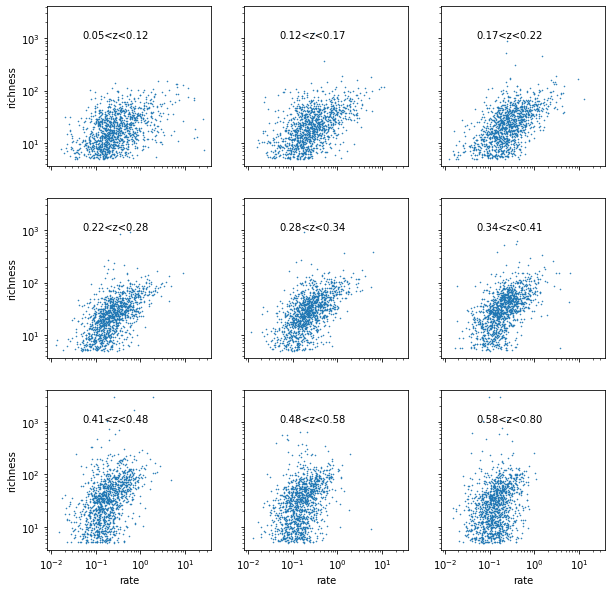

In [6]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

numz = len(axes.flatten())+1
zbins = np.percentile(scidata_erassX['best_z'][flag], np.linspace(0, 100, num=numz))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, ) # c=scidata_erassX['EXT'][in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [64]:
with open('Pz_Plambda_random.npy', 'rb') as f:
    z_cen = np.load(f)
    PDF_z = np.load(f)
    CFD_z = np.load(f)
    lambda_cen = np.load(f)
    PDF_lambda = np.load(f)
    CDF_lambda = np.load(f)

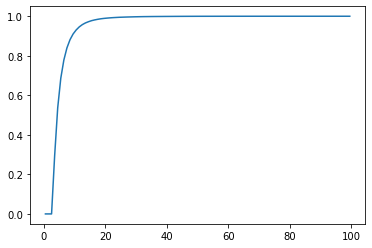

In [68]:
plt.plot(lambda_cen, CDF_lambda)

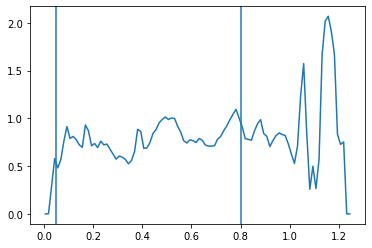

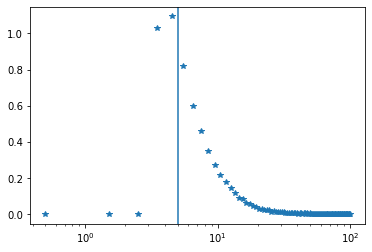

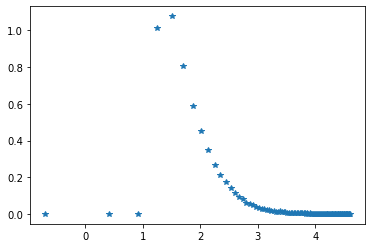

In [67]:
plt.figure()
plt.plot(z_cen, PDF_z)
plt.axvline(zmin)
plt.axvline(zmax)

plt.figure()
plt.plot(lambda_cen, PDF_lambda*lambda_cen, '*')
plt.axvline(lam_min)
plt.xscale('log')
#plt.yscale('log')

P_lnl_cont_arr = PDF_lambda*lambda_cen
lnl_cont_arr = np.log(lambda_cen)

P_lnl_cont_arr /= 0.5*np.sum( (lnl_cont_arr[1:]-lnl_cont_arr[:-1])*(P_lnl_cont_arr[1:]+P_lnl_cont_arr[:-1]) )

plt.figure()
plt.plot(lnl_cont_arr, P_lnl_cont_arr, '*')
#plt.yscale('log')

In [9]:
print(np.unique(scidata_erassX['BEST_Z_TYPE']))

['cg_spec_z' 'lit_z' 'nan' 'photo_z' 'spec_z_boot']


In [10]:
print(np.unique(scidata_erassX['LEGACY_DR9_NORTH_NOPSF_GRZ_Z_0.05_0.85_VL0.2_I1']))
check = scidata_erassX['LEGACY_DR9_NORTH_NOPSF_GRZ_Z_0.05_0.85_VL0.2_I1'] & \
        scidata_erassX['LEGACY_DR9_SOUTH_NOPSF_GRZ_Z_0.05_0.85_VL0.2_I1']
print(np.unique(check))
# 'LEGACY_DR9_NORTH_NOPSF_GRZ_Z_0.05_0.85_VL0.2_I1'
# 'LEGACY_DR9_SOUTH_NOPSF_GRZ_Z_0.05_0.85_VL0.2_I1'
# 'LEGACY_DR9_SOUTH_GRZW1_W1_0.05_1.20_VL0.4_I1'
# 'LEGACY_DR9_NORTH_GRZW1_W1_0.05_1.20_VL0.4_I1'
# 'KIDS_DR4.1_GRZ_Z_0.05_0.85_VL0.2_I1'
# 'DES_Y1_MOF_GRZ_Z_0.05_0.85_VL0.2_I1'
# 'PS1_DR2_GRI_Z_0.05_0.60_VL0.2_I1'
# 'NSC_DR2_GRZ_Z_0.05_0.70_VL0.2_I1'


[False  True]
[False]


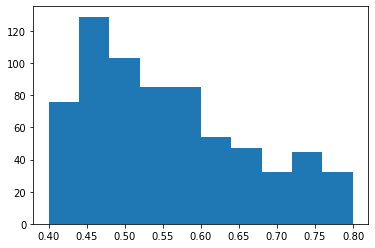

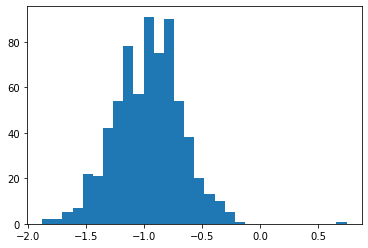

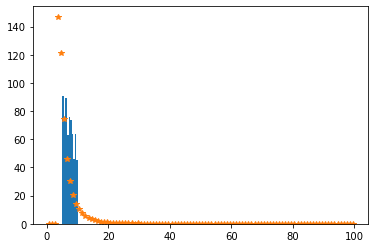

In [11]:
pretty_cont = (scidata_erassX['best_z']>0.4) & (scidata_erassX['lambda_norm']<10) & flag

plt.figure()
_ = plt.hist(scidata_erassX['best_z'][pretty_cont])

plt.figure()
_ = plt.hist(np.log10(scidata_erassX[CR_KEY][pretty_cont]), bins=30)

plt.figure()
_ = plt.hist(scidata_erassX['lambda_norm'][pretty_cont])
plt.plot(lambda_cen, 500*PDF_lambda, '*')

1.6122448979591837


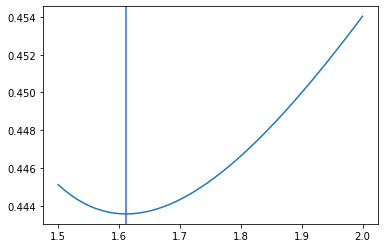

In [12]:
slopes = np.linspace(1.5, 2., num=50)
var = np.zeros(len(slopes))

for i in range(len(var)):
    scaled_obs = scidata_erassX[CR_KEY][pretty_cont]*(scidata_erassX['ML_EXP_1'][pretty_cont]/1e-1)**(1/slopes[i])
    var[i] = np.std(np.log(scaled_obs))
    
plt.figure()
plt.plot(slopes, var)

best_slope = slopes[np.argmin(var)]
plt.axvline(best_slope)
print(best_slope)

In [13]:
print(1/best_slope)

0.620253164556962


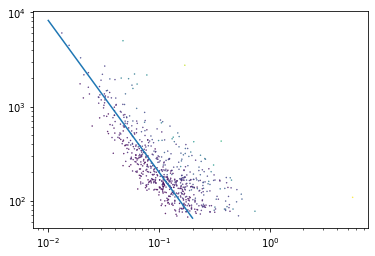

In [14]:


plt.figure()
_ = plt.scatter(scidata_erassX[CR_KEY][pretty_cont], scidata_erassX['ML_EXP_1'][pretty_cont], s=0.2,
               c=scidata_erassX['EXT_LIKE'][pretty_cont], norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
xx = np.logspace(-2, np.log10(2e-1), num=100)
plt.plot(xx, 2e2*(xx/1e-1)**(-best_slope))

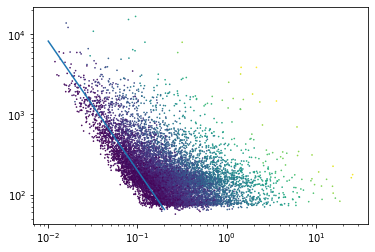

In [15]:
plt.figure()
_ = plt.scatter(scidata_erassX[CR_KEY][flag], scidata_erassX['ML_EXP_1'][flag], s=0.4,
               c=scidata_erassX['EXT_LIKE'][flag], norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.plot(xx, 2e2*(xx/1e-1)**(-best_slope))



In [16]:
Xobs = scidata_erassX[CR_KEY]*(scidata_erassX['ML_EXP_1']/1e-1)**(1/best_slope)

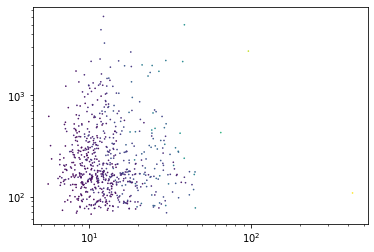

In [17]:
plt.figure()
_ = plt.scatter(Xobs[pretty_cont],
                scidata_erassX['ML_EXP_1'][pretty_cont], s=0.4,
               c=scidata_erassX['EXT_LIKE'][pretty_cont], norm=LogNorm())
plt.xscale('log')
plt.yscale('log')
xx = np.logspace(-2, np.log10(2e-1), num=100)
# plt.plot(xx, 2e2*(xx/1e-1)**(-1.5))



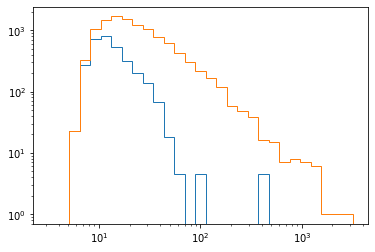

In [18]:
bins = np.logspace(0.5, 3.5, num=30)

IC = 4.5

plt.figure()
_ = plt.hist(Xobs[pretty_cont],
             histtype='step', bins=bins,
            weights = IC*np.ones(len(scidata_erassX[CR_KEY][pretty_cont])))


_ = plt.hist( Xobs[flag], 
            histtype='step', bins=bins)

plt.xscale('log')
plt.yscale('log')

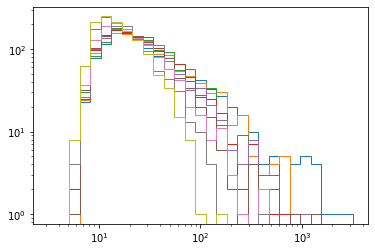

In [19]:
plt.figure()

for i in range(len(zbins)-1):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    _ = plt.hist( Xobs[in_bin], 
            histtype='step', bins=bins)
    
    
plt.xscale('log')
plt.yscale('log')

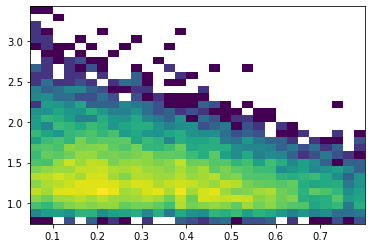

In [20]:
plt.figure()

_ = plt.hist2d(scidata_erassX['best_z'][flag], np.log10(Xobs)[flag], bins=30, norm=LogNorm())

In [21]:
values = np.vstack( (scidata_erassX['best_z'][flag_fit], np.log10(Xobs)[flag_fit]) )

kernel = st.gaussian_kde(values)

kernel_z = st.gaussian_kde(scidata_erassX['best_z'][flag_fit])

In [22]:
xmin = values[0].min()
xmax = values[0].max()
ymin = values[1].min()
ymax = values[1].max()

In [23]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:120j]

positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(kernel(positions).T, X.shape)/kernel_z(np.linspace(xmin, xmax, num=100))[:, None]


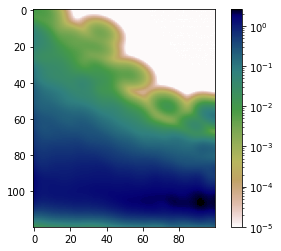

In [24]:
plt.figure()

plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, norm=LogNorm(vmin=1e-5))

plt.colorbar()

In [25]:
values_all = np.vstack( (scidata_erassX['best_z'], np.log10(Xobs)) )

dNtot = kernel(values_all)/kernel_z(scidata_erassX['best_z'])

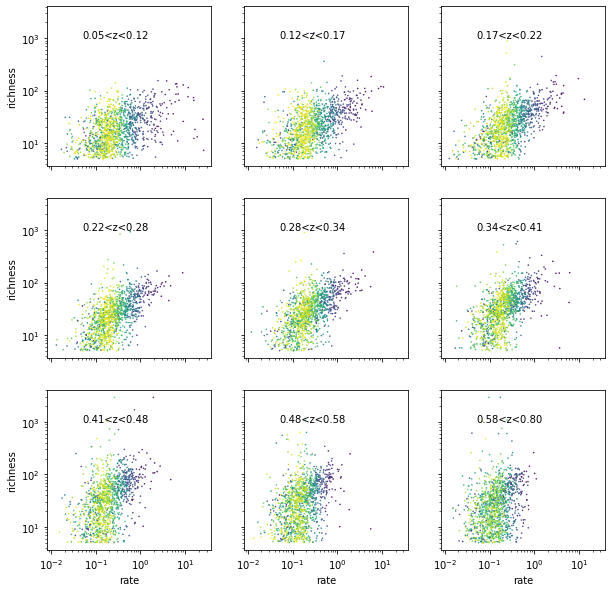

In [26]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=dNtot[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [27]:
kernel_cont = st.gaussian_kde(np.log10(Xobs)[pretty_cont & (Xobs<9e1)])

In [28]:
def dN_cont(xobs, params=[7., 3.2, 1.2]):
    
    cut_off_pos, left_l, right_l = params
    
    scaled_xx = xobs/cut_off_pos
    
    left_part = np.exp(-left_l*(1/scaled_xx-1) ) 
    right_part = np.exp(-right_l*(scaled_xx-1) )
    
    return np.where(xobs<cut_off_pos, left_part, right_part)

(1, 12001.760047374557)

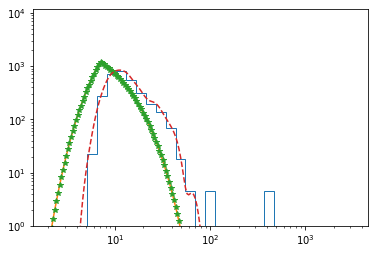

In [29]:
plt.figure()
_ = plt.hist(Xobs[pretty_cont],
             histtype='step', bins=bins,
            weights = IC*np.ones(len(scidata_erassX[CR_KEY][pretty_cont])))

plt.xscale('log')
plt.yscale('log')

xx = np.logspace(0.3, 2, num=100)

cut_off_pos = 7.

scaled_xx = xx/cut_off_pos

amp = 12e2
left_l = 3.2
right_l = 1.2
left_part =  amp*(np.exp(-left_l*(1/scaled_xx-1) ) )
right_part = amp*(np.exp(-right_l*(scaled_xx-1) ) )

join = np.where(xx<cut_off_pos, left_part, right_part)
join2 = amp*dN_cont(xx)
kde_cont = kernel_cont(np.log10(xx))

plt.plot(xx, join)
plt.plot(xx, join2, '*')
plt.plot(xx, 0.5*np.sum(pretty_cont)*kde_cont, '--')

plt.ylim([1, None])

In [30]:
dNcont = kernel_cont(np.log10(Xobs))

In [31]:
print(np.where(np.isnan(dNcont)))
print(np.where(~np.isfinite(dNcont)))

(array([], dtype=int64),)
(array([], dtype=int64),)


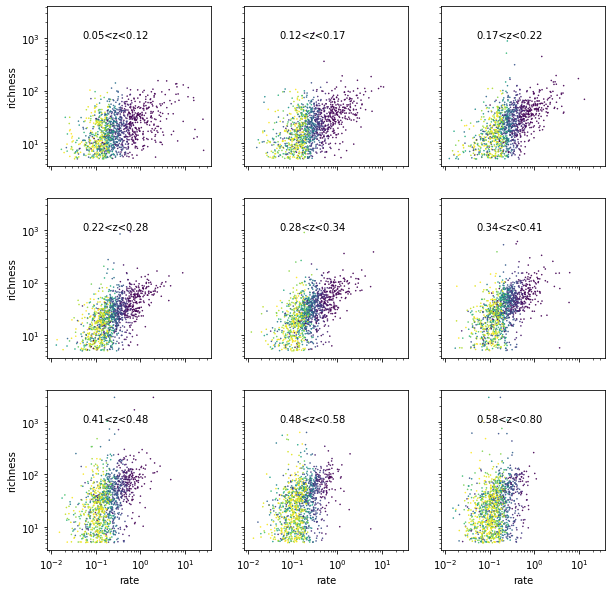

In [32]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=dNcont[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [33]:
frac = dNcont/dNtot

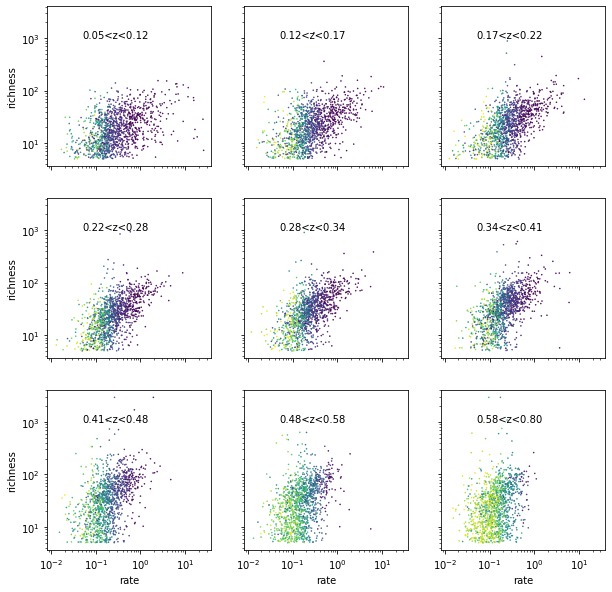

In [34]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=frac[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

(array([3057., 3384., 2034., 1156.,  643.,  466.,  296.,   81.,   28.,
           7.]),
 array([5.03427847e-235, 4.68486419e-001, 9.36972838e-001, 1.40545926e+000,
        1.87394568e+000, 2.34243210e+000, 2.81091851e+000, 3.27940493e+000,
        3.74789135e+000, 4.21637777e+000, 4.68486419e+000]),
 <BarContainer object of 10 artists>)

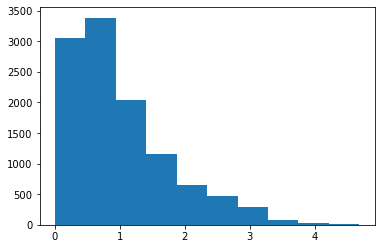

In [35]:
plt.hist(frac[flag])

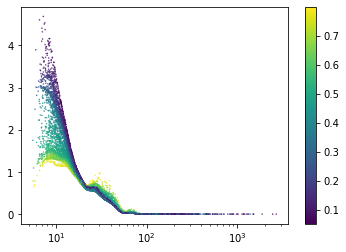

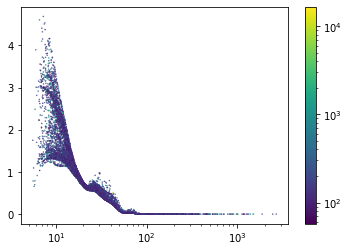

In [36]:
plt.figure()
plt.scatter(Xobs[flag], frac[flag], s=0.2, c=scidata_erassX['best_z'][flag])
plt.xscale('log')
plt.colorbar()

plt.figure()
plt.scatter(Xobs[flag], frac[flag], s=0.2, c=scidata_erassX['ML_EXP_1'][flag], norm=LogNorm())
plt.xscale('log')
plt.colorbar()

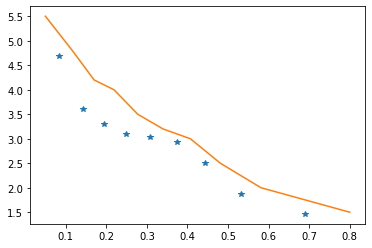

In [37]:
znodes = 0.5*(zbins[1:]+zbins[:-1])

frac_max = np.zeros(len(znodes))

for i in range(len(znodes)):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    frac_max[i] = np.amax(frac[in_bin])
    
plt.figure()
plt.plot(znodes, frac_max, '*')

amps= 1./np.array([5.5, 4.8, 4.2, 4, 3.5, 3.2, 3, 2.5, 2, 1.5])

plt.plot(zbins, 1./amps)

In [38]:
A = np.interp(scidata_erassX['best_z'], zbins, amps)

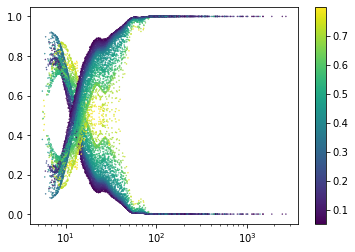

In [39]:
plt.figure()
plt.scatter(Xobs[flag], A[flag]*frac[flag], s=0.2, c=scidata_erassX['best_z'][flag])

plt.scatter(Xobs[flag], 1-A[flag]*frac[flag], s=0.2, c=scidata_erassX['best_z'][flag])
plt.xscale('log')
plt.colorbar()

In [40]:
P_l_cont = np.exp(np.interp(np.log(scidata_erassX['lambda_norm']),
                            lnl_cont_arr, np.log(P_lnl_cont_arr)))

/home/grandis/miniconda3/envs/cosmoHammer/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [41]:
pp = P_l_cont*A*frac

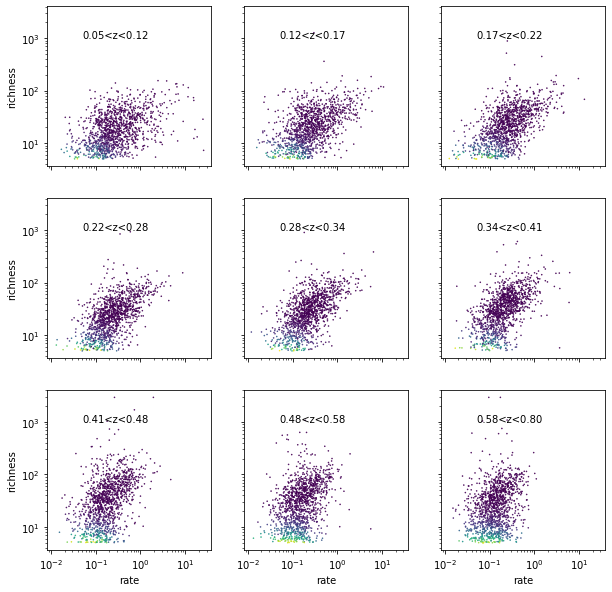

In [42]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=pp[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [43]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [44]:
dl = cosmo.luminosity_distance(scidata_erassX['best_z']).value /  cosmo.luminosity_distance(0.3).value

[0.05001339 0.11633703 0.16996798 0.21887118 0.27750877 0.3397091
 0.40713856 0.48098898 0.58111638 0.79990977]


/home/grandis/miniconda3/envs/cosmoHammer/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt
/home/grandis/miniconda3/envs/cosmoHammer/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


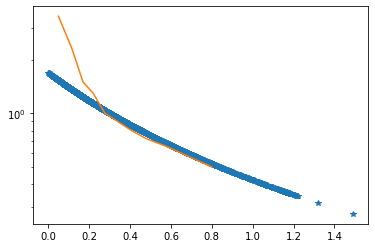

In [45]:
cr_med = 2e-1
lam_med = 3e1
cr_slope = 1.5
zpiv = 0.3
ztrend = -2

amps= np.array([3.5, 2.3, 1.5, 1.3, 1., 0.9, 0.8, 0.72, 0.65, 0.5])
print(zbins)

pred_lam = lam_med * (scidata_erassX[CR_KEY]/cr_med*dl**2)**(1/cr_slope) * \
           np.interp(scidata_erassX['best_z'], zbins, amps)

sigma_int = 0.2
fudge = 0.1

plt.plot(scidata_erassX['best_z'], ((1+scidata_erassX['best_z'])/(1+zpiv))**ztrend, '*')
plt.yscale('log')

plt.plot(zbins, amps)



var = sigma_int**2 + (pred_lam-1)/pred_lam**2 + \
      (fudge/scidata_erassX[CR_KEY]/scidata_erassX['ML_EXP_1'])**(1/cr_slope)

malmquist = st.norm.sf(np.log(lam_min), loc=np.log(pred_lam), scale=np.sqrt(var))

P_sr = 1/np.sqrt(2*np.pi*var)*np.exp(-0.5*np.log(scidata_erassX['lambda_norm']/pred_lam)**2/var)

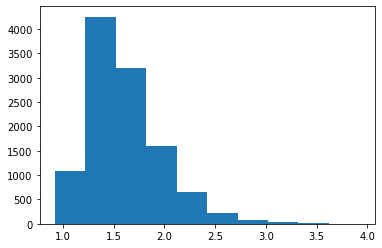

In [46]:
_ = plt.hist( np.log10(scidata_erassX[CR_KEY]*scidata_erassX['ML_EXP_1'])[flag] )

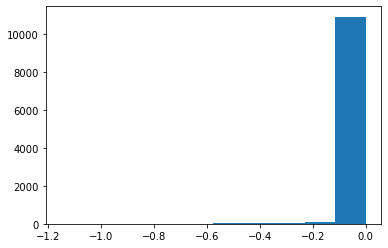

In [47]:
_ = plt.hist( np.log10(malmquist)[flag] )

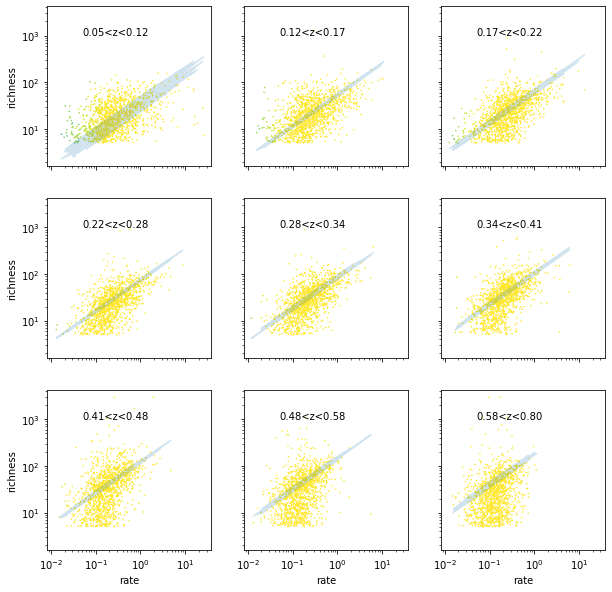

In [48]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=malmquist[in_bin], norm=LogNorm(vmin=1e-3))
    ax.plot(scidata_erassX[CR_KEY][in_bin], pred_lam[in_bin], alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

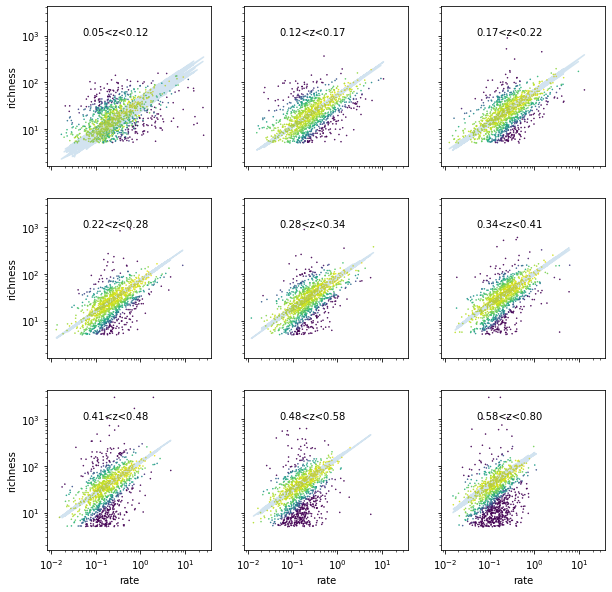

In [49]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=P_sr[in_bin], norm=LogNorm(vmin=1e-3))
    ax.plot(scidata_erassX[CR_KEY][in_bin], pred_lam[in_bin], alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [50]:
L_tot = pp + (1-A*frac)*P_sr

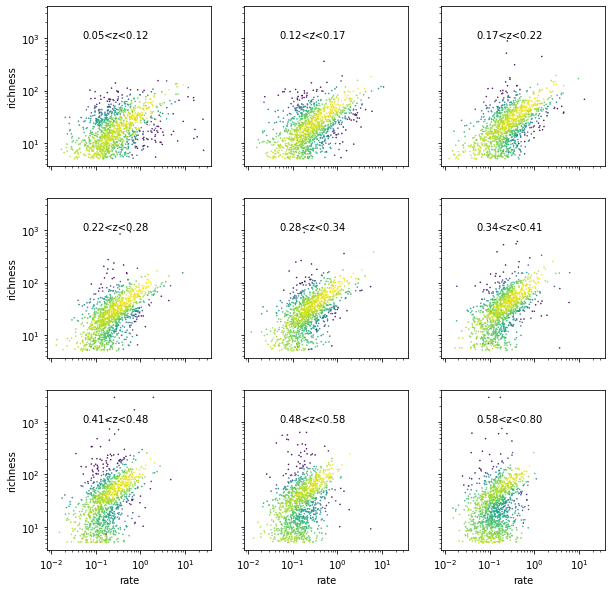

In [51]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=L_tot[in_bin], norm=LogNorm(vmin=1e-4))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [52]:
prob_cont = pp/L_tot
    
prob_cluster = (1-A*frac)*P_sr/L_tot 

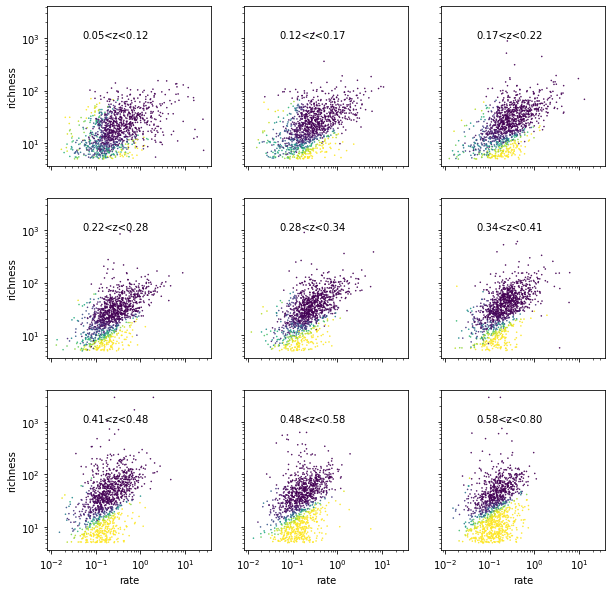

In [53]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=prob_cont[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

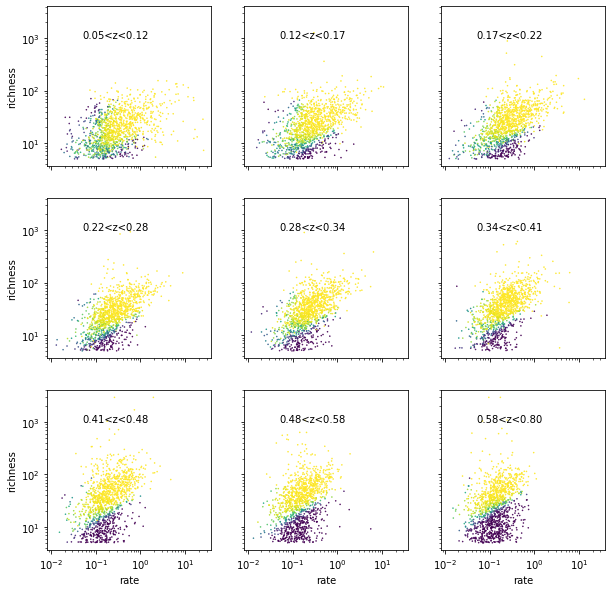

In [54]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10, 10))

# 'EXT_LIKE'
# 'ML_EXP_1'
# 'EXT'

for i, ax in enumerate(axes.flatten()):
    in_bin = (zbins[i]<scidata_erassX['best_z']) & (scidata_erassX['best_z']<zbins[i+1]) & flag
    
    ax.scatter(scidata_erassX[CR_KEY][in_bin], scidata_erassX['lambda_norm'][in_bin], 
               s=0.3, c=prob_cluster[in_bin])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.text(0.05, 1e3, '%.2f<z<%.2f'%(zbins[i], zbins[i+1]))
    if i in [0, 3, 6]:
        ax.set_ylabel('richness')
    if i>=6:
        ax.set_xlabel('rate')

In [55]:
print(np.sum(np.log(L_tot[flag])))

-24953.452735962437


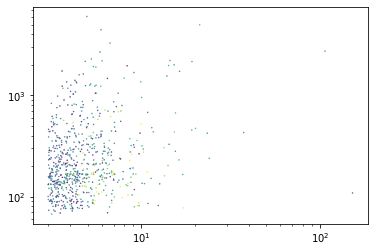

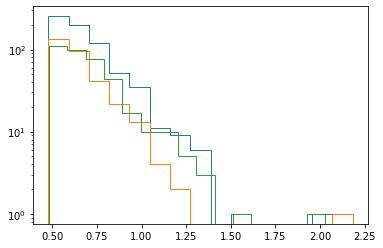

In [56]:
plt.figure()
_ = plt.scatter(scidata_erassX['EXT_LIKE'][pretty_cont], scidata_erassX['ML_EXP_1'][pretty_cont], s=0.2,
               c=scidata_erassX['EXT'][pretty_cont], norm=LogNorm())
plt.xscale('log')
plt.yscale('log')

med_exp = np.median(scidata_erassX['ML_EXP_1'])
low_exp = (scidata_erassX['ML_EXP_1']<med_exp) & pretty_cont
hi_exp = (scidata_erassX['ML_EXP_1']>med_exp) & pretty_cont

plt.figure()
_ = plt.hist(np.log10(scidata_erassX['EXT_LIKE'][pretty_cont]), histtype='step', bins=15)
_ = plt.hist(np.log10(scidata_erassX['EXT_LIKE'][low_exp]), histtype='step', bins=15)
_ = plt.hist(np.log10(scidata_erassX['EXT_LIKE'][hi_exp]), histtype='step', bins=15)
plt.yscale('log')